# Análise de problemas de voôs utilizando aprendizado não supervisionado

Utilizando como base dados de voôs do ano de 2015, vamos realizar a análise de alguns dados e insights para montar uma análise de dados utilizando a modelagem não supervisionada.

Para iniciar, vamos baixar as bibliotecas

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

%pip install gdown

Note: you may need to restart the kernel to use updated packages.


Baixando os dados do Google Drive para trabalharmos

In [3]:
# Baixando dados airlines.csv
!gdown "https://drive.google.com/uc?id=1R7CXjnud_PceDr6xLITAB0ZJpJVRBbTM"

# Baixando dados airports.csv
!gdown "https://drive.google.com/uc?id=1e1Gvpsk9urYA2tSDBuJ4YPZfELvj89yZ"

# Baixando dados flights.csv
!gdown "https://drive.google.com/uc?id=1ceyRYUzkF22E_PvwKBF0s2oyhWZpRGGN"

# Baixando dados flights_red.csv
#!gdown "https://drive.google.com/uc?id=1ByAbcwhO00THj9PVzJBCmTPfSoDvNRf8"


Downloading...
From: https://drive.google.com/uc?id=1R7CXjnud_PceDr6xLITAB0ZJpJVRBbTM
To: /Users/rubensrodrigues/Downloads/TC_Fase3/flight_local_analises/airlines.csv
100%|███████████████████████████████████████████| 359/359 [00:00<00:00, 672kB/s]
Downloading...
From: https://drive.google.com/uc?id=1e1Gvpsk9urYA2tSDBuJ4YPZfELvj89yZ
To: /Users/rubensrodrigues/Downloads/TC_Fase3/flight_local_analises/airports.csv
100%|██████████████████████████████████████| 23.9k/23.9k [00:00<00:00, 1.51MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1ceyRYUzkF22E_PvwKBF0s2oyhWZpRGGN
From (redirected): https://drive.google.com/uc?id=1ceyRYUzkF22E_PvwKBF0s2oyhWZpRGGN&confirm=t&uuid=5fc037f2-6ef9-43b8-854c-2b152ce537bf
To: /Users/rubensrodrigues/Downloads/TC_Fase3/flight_local_analises/flights.csv
100%|████████████████████████████████████████| 592M/592M [00:20<00:00, 28.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=1ByAbcwhO00THj9PVzJBCmTPfSoDvNRf8
To: /Users/rubensrodrigu

Lendo o arquivo de voos

In [4]:
df = pd.read_csv('flights.csv',encoding='utf-8',low_memory=False)

df.keys()

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'],
      dtype='object')

## Preparando a database para trabalhar com os dados

In [5]:
# Agora, preenchemos os valores vazios de duas colunas numéricas: renda bruta (gross) e orçamento (budget) com 0's.

df.fillna({'DEPARTURE_TIME': 0}, inplace=True)
df.fillna({'DEPARTURE_DELAY': 0}, inplace=True)
df.fillna({'TAXI_OUT': 0}, inplace=True)
df.fillna({'WHEELS_OFF': 0}, inplace=True)
df.fillna({'ARRIVAL_TIME': 0}, inplace=True)
df.fillna({'ARRIVAL_DELAY': 0}, inplace=True)
df.fillna({'CANCELLATION_REASON': 0}, inplace=True)
df.fillna({'AIR_SYSTEM_DELAY': 0}, inplace=True)
df.fillna({'SECURITY_DELAY': 0}, inplace=True)
df.fillna({'AIRLINE_DELAY': 0}, inplace=True)
df.fillna({'LATE_AIRCRAFT_DELAY': 0}, inplace=True)
df.fillna({'WEATHER_DELAY': 0}, inplace=True)
df.fillna({'ELAPSED_TIME': 0}, inplace=True)
df.fillna({'AIR_TIME': 0}, inplace=True)
df.fillna({'WHEELS_ON': 0}, inplace=True)
df.fillna({'TAXI_IN': 0}, inplace=True)
df.fillna({'SCHEDULED_TIME': 0}, inplace=True)

df['DELAYED'] = np.where(df['ARRIVAL_DELAY']> 0,1, 0)
df['DELAYED'] = np.where(df['DEPARTURE_DELAY']> 0,1, df['DELAYED'])
df['FLIGHT_PROBLEM'] = np.where(df['DIVERTED'] == 1,1, 0)
df['FLIGHT_PROBLEM'] = np.where(df['CANCELLED'] == 1,1, df['FLIGHT_PROBLEM'])
df['FLIGHT_PROBLEM'] = np.where(df['DELAYED'] == 1,1, df['FLIGHT_PROBLEM'])
# df['ORIG_DEST_AIRPORT'] = df['ORIGIN_AIRPORT'].astype(str) + '_' + df['DESTINATION_AIRPORT'].astype(str)

df['SEASON'] = np.where(df['MONTH'] == 1 ,'Winter', '')
df['SEASON'] = np.where(df['MONTH'] == 2 ,'Winter', df['SEASON'])
df['SEASON'] = np.where((df['MONTH'] == 3) & (df['DAY'] < 20),'Winter', df['SEASON'])
df['SEASON'] = np.where((df['MONTH'] == 3) & (df['DAY'] >= 20),'Spring', df['SEASON'])
df['SEASON'] = np.where(df['MONTH'] == 4 ,'Spring', 'Winter')
df['SEASON'] = np.where(df['MONTH'] == 5 ,'Spring', 'Winter')
df['SEASON'] = np.where((df['MONTH'] == 6) & (df['DAY'] < 20),'Spring', df['SEASON'])
df['SEASON'] = np.where((df['MONTH'] == 6) & (df['DAY'] >= 20),'Summer', df['SEASON'])
df['SEASON'] = np.where(df['MONTH'] == 7 ,'Summer', df['SEASON'])
df['SEASON'] = np.where(df['MONTH'] == 8 ,'Summer', df['SEASON'])
df['SEASON'] = np.where((df['MONTH'] == 9) & (df['DAY'] < 22),'Summer', df['SEASON'])
df['SEASON'] = np.where((df['MONTH'] == 9) & (df['DAY'] >= 22),'Autumn', df['SEASON'])
df['SEASON'] = np.where(df['MONTH'] == 10 ,'Autumn', df['SEASON'])
df['SEASON'] = np.where(df['MONTH'] == 11 ,'Autumn', df['SEASON'])
df['SEASON'] = np.where((df['MONTH'] == 12) & (df['DAY'] < 21),'Autumn', df['SEASON'])
df['SEASON'] = np.where((df['MONTH'] == 12) & (df['DAY'] >= 21),'Winter', df['SEASON'])
 
df.head(20)

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,DELAYED,FLIGHT_PROBLEM,SEASON
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,0,0,0.0,0.0,0.0,0.0,0.0,0,0,Winter
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,0,0,0.0,0.0,0.0,0.0,0.0,0,0,Winter
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,0,0,0.0,0.0,0.0,0.0,0.0,1,1,Winter
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,0,0,0.0,0.0,0.0,0.0,0.0,0,0,Winter
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,0,0,0.0,0.0,0.0,0.0,0.0,0,0,Winter
5,2015,1,1,4,DL,806,N3730B,SFO,MSP,25,...,0,0,0.0,0.0,0.0,0.0,0.0,1,1,Winter
6,2015,1,1,4,NK,612,N635NK,LAS,MSP,25,...,0,0,0.0,0.0,0.0,0.0,0.0,0,0,Winter
7,2015,1,1,4,US,2013,N584UW,LAX,CLT,30,...,0,0,0.0,0.0,0.0,0.0,0.0,1,1,Winter
8,2015,1,1,4,AA,1112,N3LAAA,SFO,DFW,30,...,0,0,0.0,0.0,0.0,0.0,0.0,0,0,Winter
9,2015,1,1,4,DL,1173,N826DN,LAS,ATL,30,...,0,0,0.0,0.0,0.0,0.0,0.0,1,1,Winter


Aplicando One Hot Enconding em variaveis categoricas

In [6]:
# Aplicando One Hot Encoding

df['SEASON_NUM'] = df['SEASON'].astype('category').cat.codes
df['AIRLINE_NUM'] = df['AIRLINE'].astype('category').cat.codes
df['ORIGIN_AIRPORT_NUM'] = df['ORIGIN_AIRPORT'].astype('category').cat.codes
df['DESTINATION_AIRPORT_NUM'] = df['DESTINATION_AIRPORT'].astype('category').cat.codes
df['TAIL_NUMBER_NUM'] = df['TAIL_NUMBER'].astype('category').cat.codes
df['CANCELLATION_REASON_NUM'] = df['CANCELLATION_REASON'].astype('category').cat.codes

df.drop(columns=['SEASON', 'AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'TAIL_NUMBER', 'CANCELLATION_REASON'], inplace=True)


## Lendo estatisticas de problemas em voos (com atraso, cancelamento ou desvio do aeroporto de origem)

In [7]:
flights = len(df)

delayed_cond = (df['DELAYED'] == 1) 
df_delayed = df[delayed_cond]

diverted_cond = (df['DIVERTED'] == 1) 
df_diverted = df[diverted_cond]

cancelled_cond = (df['CANCELLED'] == 1) 
df_cancelled = df[cancelled_cond]

problems_cond = (df['FLIGHT_PROBLEM'] == 1)
df_problems = df[problems_cond]

print("Total de voos: ",flights)
print("Voos com atraso: ",len(df_delayed))
print("Voos desviados: ",len(df_diverted))
print("Voos cancelados: ",len(df_cancelled))
print("Voos com problemas: ",len(df_problems))

perc_problems = (len(df_problems)/flights) * 100
print(f"{perc_problems:.2f}% de voos com problemas ")


Total de voos:  5819079
Voos com atraso:  2704367
Voos desviados:  15187
Voos cancelados:  89884
Voos com problemas:  2798869
48.10% de voos com problemas 


Percebemos que há um número grande de voos com problemas, chegando a quase a metade

## Aplicando a padronização de informações

In [8]:
# Check for NaN columns
df.isnull().sum()

YEAR                       0
MONTH                      0
DAY                        0
DAY_OF_WEEK                0
FLIGHT_NUMBER              0
SCHEDULED_DEPARTURE        0
DEPARTURE_TIME             0
DEPARTURE_DELAY            0
TAXI_OUT                   0
WHEELS_OFF                 0
SCHEDULED_TIME             0
ELAPSED_TIME               0
AIR_TIME                   0
DISTANCE                   0
WHEELS_ON                  0
TAXI_IN                    0
SCHEDULED_ARRIVAL          0
ARRIVAL_TIME               0
ARRIVAL_DELAY              0
DIVERTED                   0
CANCELLED                  0
AIR_SYSTEM_DELAY           0
SECURITY_DELAY             0
AIRLINE_DELAY              0
LATE_AIRCRAFT_DELAY        0
WEATHER_DELAY              0
DELAYED                    0
FLIGHT_PROBLEM             0
SEASON_NUM                 0
AIRLINE_NUM                0
ORIGIN_AIRPORT_NUM         0
DESTINATION_AIRPORT_NUM    0
TAIL_NUMBER_NUM            0
CANCELLATION_REASON_NUM    0
dtype: int64

Aplicando a padronização de informações

In [9]:
scaler = StandardScaler()
scaler.fit(df)

scaled_data = scaler.transform(df)


# Aplicando o PCA

In [10]:
pca = PCA(n_components=2)
pca.fit(scaled_data)

x_pca = pca.transform(scaled_data)
print(scaled_data.shape)
print(x_pca.shape)

(5819079, 34)
(5819079, 2)


## Imprimindo as informações


In [11]:
print("Variância explicada: ",pca.explained_variance_ratio_)
print("Valores singulares: ",pca.singular_values_)

Variância explicada:  [0.16176675 0.12459739]
Valores singulares:  [5573.5092996  4891.46064789]


## Plotando os componentes

Text(0, 0.5, 'Segundo componente principal')

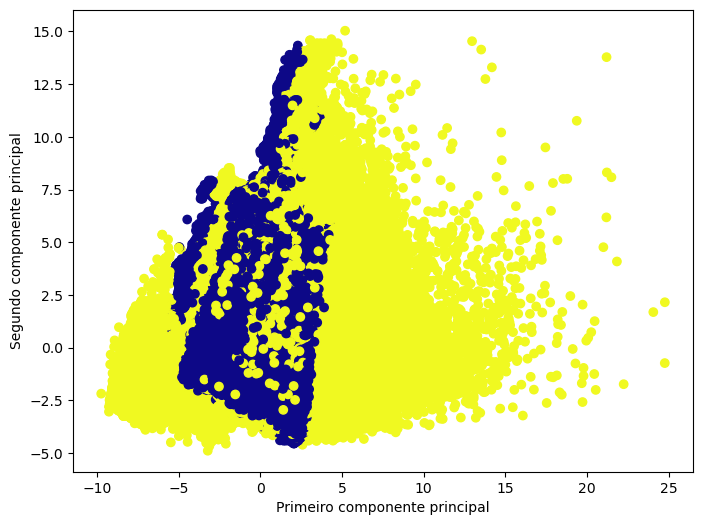

In [12]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=df['FLIGHT_PROBLEM'],cmap='plasma')
plt.xlabel('Primeiro componente principal')
plt.ylabel('Segundo componente principal')

<Axes: >

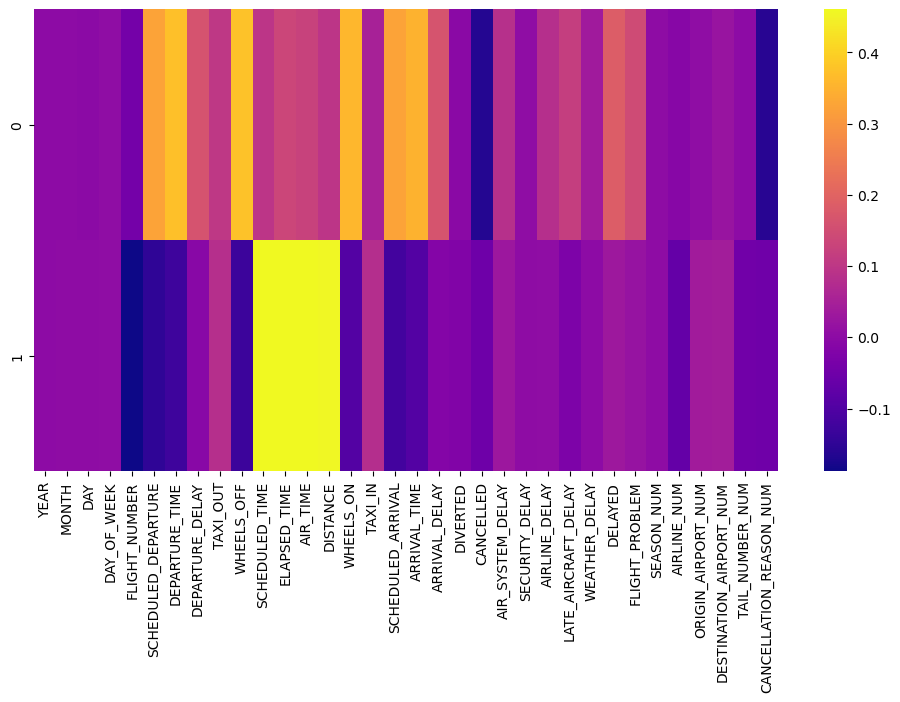

In [13]:
df_comp = pd.DataFrame(pca.components_,columns=df.keys())
plt.figure(figsize=(12,6))
sns.heatmap(df_comp,cmap='plasma',)

Percebemos que as colunas 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'CANCELLATION_REASON_NUM' apresentam baixa variação e serão retiradas para uma melhor performance 

In [14]:
df.drop(columns=['FLIGHT_NUMBER','SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'WHEELS_OFF', 'WHEELS_ON', 'SCHEDULED_ARRIVAL','ARRIVAL_TIME'], inplace=True)
df.drop(columns=['ARRIVAL_DELAY', 'CANCELLATION_REASON_NUM', 'CANCELLED', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'], inplace=True)


Repassando as informações do PCA sem as variaveis

In [15]:
scaler = StandardScaler()
scaler.fit(df)

scaled_data = scaler.transform(df)

pca = PCA(n_components=2)
pca.fit(scaled_data)

x_pca = pca.transform(scaled_data)

print("Variância explicada: ",pca.explained_variance_ratio_)
print("Valores singulares: ",pca.singular_values_)


Variância explicada:  [0.21215228 0.12945977]
Valores singulares:  [4843.14843427 3783.3049062 ]


Percebe-se um aumento da diferenciação do primeiro componente

Text(0, 0.5, 'Segundo componente principal')

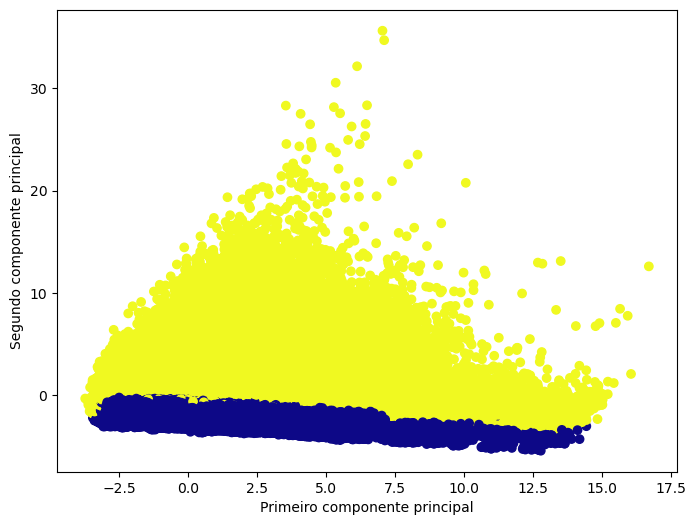

In [16]:

plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=df['FLIGHT_PROBLEM'],cmap='plasma')
plt.xlabel('Primeiro componente principal')
plt.ylabel('Segundo componente principal')

<Axes: >

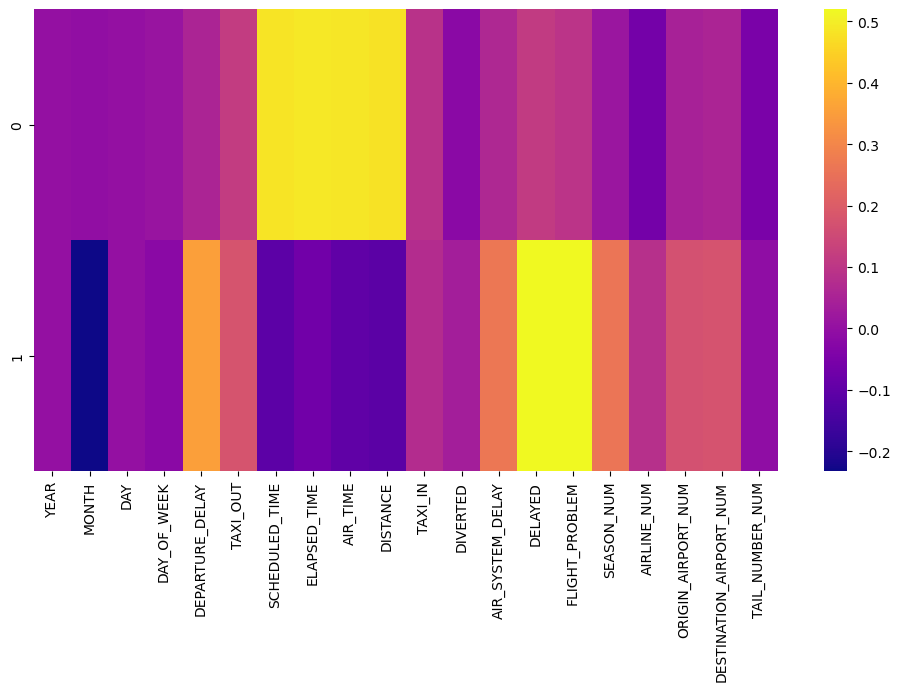

In [17]:
df_comp = pd.DataFrame(pca.components_,columns=df.keys())
plt.figure(figsize=(12,6))
sns.heatmap(df_comp,cmap='plasma',)

# Análise crítica

Realizamos a inserção de variaveis de estação do ano para melhorar a análise do correlação de variáveis.

Porém, percebemos analisando os dados que as seguintes variáveis não apresentam muita variação na questão da melhoria da análise de problemas ou não de voos.

'FLIGHT_NUMBER','SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'WHEELS_OFF', 'WHEELS_ON', 'SCHEDULED_ARRIVAL','ARRIVAL_TIME'
'ARRIVAL_DELAY', 'CANCELLATION_REASON_NUM', 'CANCELLED', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'

Com isso, saimos de 33 dimensões para 19 dimensões.

Aplicando o PCA, reduzimos para 2 componentes, que ajuda a reduzir os custos de máquina e melhoria da machine learning.

O problema da utilização da PCA é que ainda temos muitas váriaveis e não permite a boa visualização do modelo.

Para os próximos passos, podemos juntar o PCA com o modelo de classificação para uma melhor junção dos dois modelos.